In this notebook, we will try creating a <b>Decision Tree model</b> on the <b>Aussie Rain Dataset</b>, we will discuss about the <b>working of the model</b>, <b>overfitting</b> and also about <b>hyperparameter tuning</b>.

## Problem Statement

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)

In [2]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Downloading the data

In [4]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prazhar
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|█████████████████████████████████████████████████████████████████████████████| 3.83M/3.83M [00:01<00:00, 2.31MB/s]


In [6]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [7]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [8]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Since, we have already seen this data previously so we will not be doing exploratory and data analysis this time. We can directly move on to pre-processing steps.

In [10]:
raw_df.dropna(subset=['RainTomorrow'], inplace = True)

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

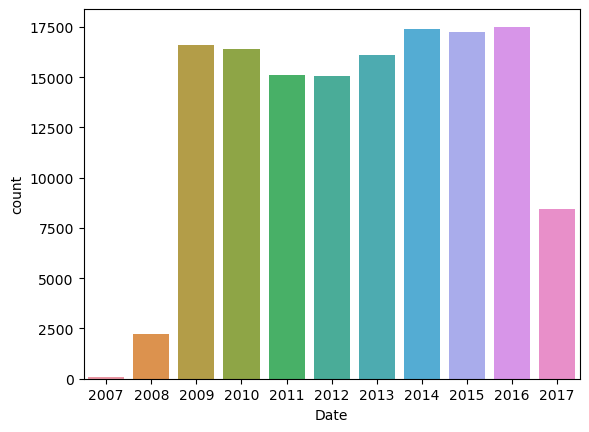

In [13]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

### Creating Train, Validation and Test datasets

In [20]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

In [50]:
train_inputs = train_df[train_df.columns[1:-1]].copy()
train_targets = train_df['RainTomorrow'].copy()

val_inputs = val_df[val_df.columns[1:-1]].copy()
val_targets = val_df['RainTomorrow'].copy()

test_inputs = test_df[test_df.columns[1:-1]].copy()
test_targets = test_df['RainTomorrow'].copy()

In [34]:
# Identifying numeric and categorical columns
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=object).columns.tolist()

### Imputing missing values

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(raw_df[numerical_cols])

train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [46]:
val_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling numeric values

In [53]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = MinMaxScaler().fit(raw_df[numerical_cols])

train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [54]:
test_inputs[numerical_cols].describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.016509,0.000000,0.000000,0.0,0.000000,0.007752,0.0,0.000000,0.04,0.03,0.024793,0.0000,0.000000,0.000000,0.000000,0.0
max,0.941038,0.984877,0.606469,1.0,0.972414,0.883721,1.0,0.747126,1.00,1.00,0.988430,0.9504,0.888889,0.888889,0.945148,1.0


### Encoding categorical values

In [70]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [71]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [72]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Asus\AppData\Local\Temp\ipykernel_5108\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Asus\AppData\Local\Temp\ipykernel_5108\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Asus\AppData\Local\Temp\ipykernel_5108\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

In [73]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,-1.796709,-3.150682,-0.277606,-1.296905,-1.877298,ENE,-2.915073,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,-1.794868,-3.161306,-0.277479,-1.296905,-1.877298,SSE,-2.917355,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,-1.804076,-3.189192,-0.276905,-1.296905,-1.877298,ENE,-2.918496,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,-1.808127,-3.187599,-0.272639,-1.296905,-1.877298,SSE,-2.923630,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,Albury,-1.814757,-3.189724,-0.275441,-1.296905,-1.877298,ENE,-2.928194,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,-1.858956,-3.192645,-0.277606,-1.296905,-1.877298,E,-2.928194,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,-1.861535,-3.188396,-0.277606,-1.296905,-1.877298,E,-2.928194,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,-1.858588,-3.183349,-0.277606,-1.296905,-1.877298,NNW,-2.933328,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,-1.851958,-3.179100,-0.277606,-1.296905,-1.877298,N,-2.924771,SE,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [75]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training and Evaluation

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model = DecisionTreeClassifier(random_state=42)

In [78]:
%%time
model.fit(X_train, train_targets)

Wall time: 6.99 s


DecisionTreeClassifier(random_state=42)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
train_pred = model.predict(X_train)

In [82]:
accuracy_score(train_pred, train_targets)

0.9999797955307714

In [83]:
model.predict_proba(X_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

So, we observe that the model has about 100% accuracy and also it is very confident about its results. Let us predict it for the validation data and see how the model performs for new data.

In [86]:
val_preds = model.predict(X_val)

In [88]:
accuracy_score(val_preds,val_targets)

0.7919447507399454

### Visualisation

In [90]:
from sklearn.tree import plot_tree, export_text

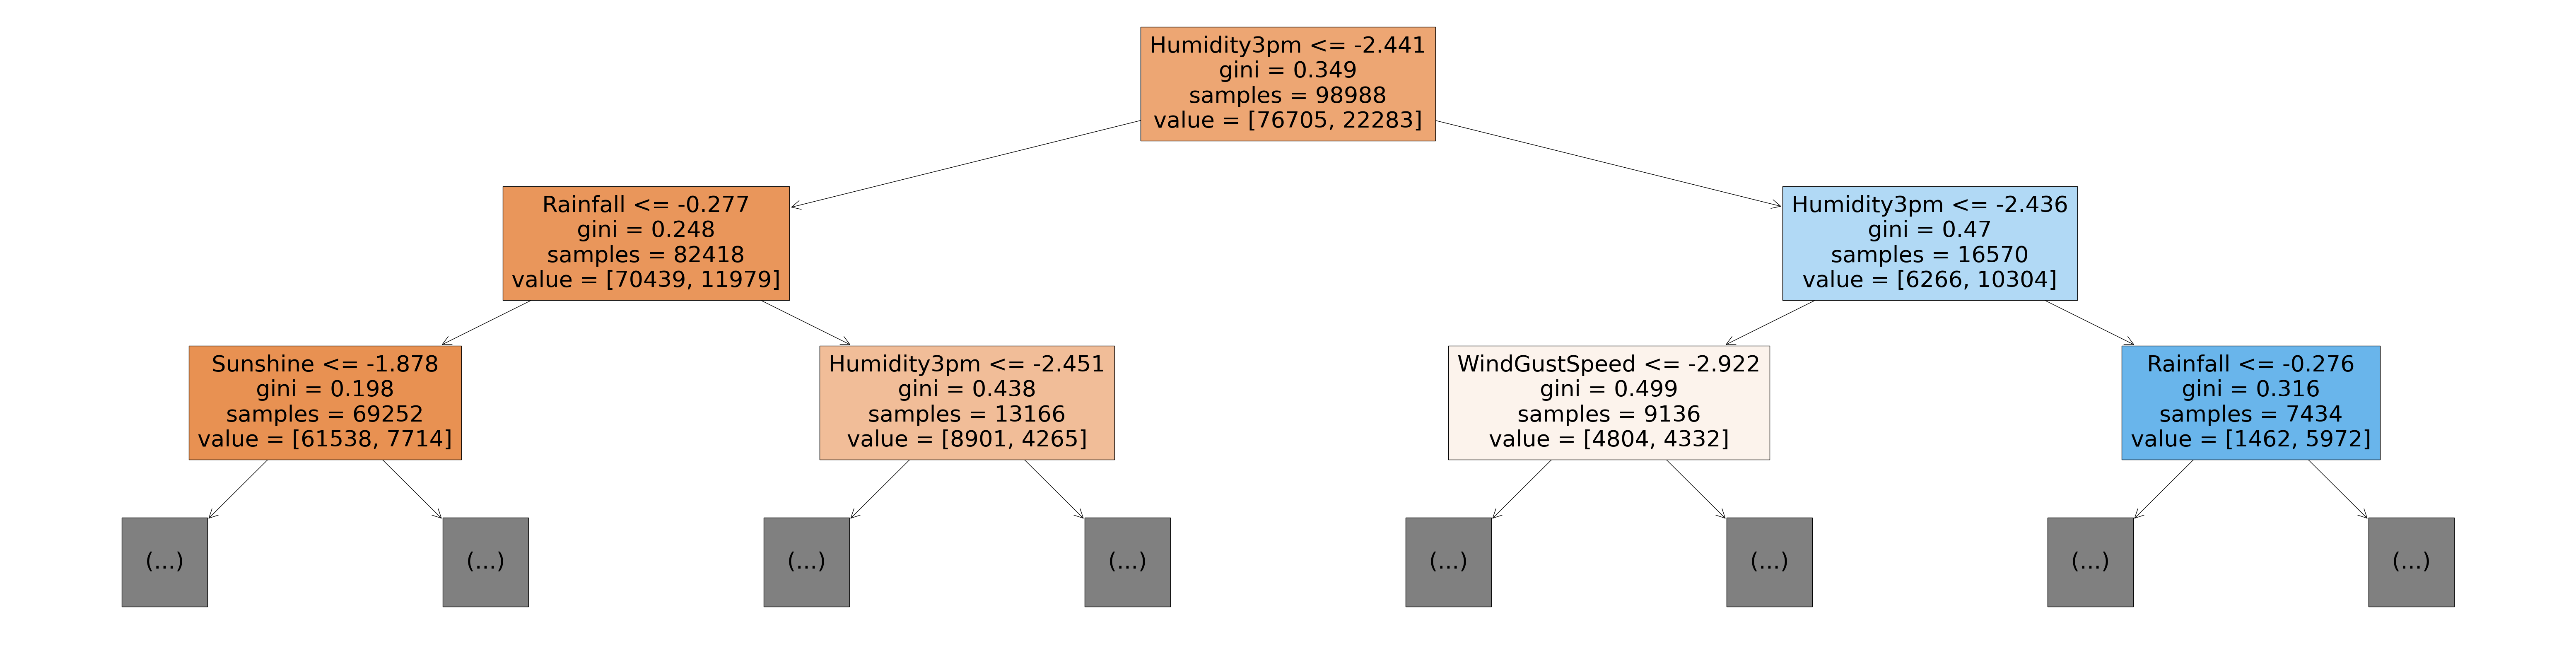

In [95]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://i.imgur.com/tlYiXnp.png" width="480">


Let's check the depth of the tree that was created.

In [96]:
model.tree_.max_depth

48

In [98]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= -2.44
|   |--- Rainfall <= -0.28
|   |   |--- Sunshine <= -1.88
|   |   |   |--- Pressure3pm <= -144.20
|   |   |   |   |--- WindGustSpeed <= -2.92
|   |   |   |   |   |--- Humidity3pm <= -2.46
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= -1.25
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= -2.11
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= -144.22
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  -144.22
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  -2.11
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= -1.85
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  -1.85
|   |   |   |   |   |   |   |   |   |  

We see that the depth of tree is 48 which means that the binary tree went for the division for as long as it could to learn completely about the training data. Since, it learned completely about the training data so it was able to predict almost 100% of the results correctly but it was not able to generalize and hence it performed poorly on the validation data. This is called overfitting.

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [99]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [101]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [102]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


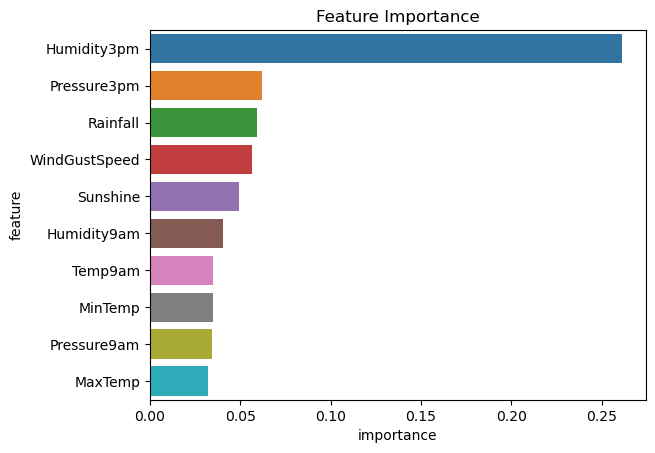

In [106]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. 


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [107]:
?DecisionTreeClassifier

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

#### a. max_depth

In [108]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [109]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [110]:
model.score(X_train, train_targets)

0.8291308037337859

In [111]:
model.score(X_val, val_targets)

0.8334397307178921

We see that now, the training and validation accuracies are very close and hence, our model is not overfitting. Let us try some other hyperparameter tuning and see if we can improve the validation accuracy further.

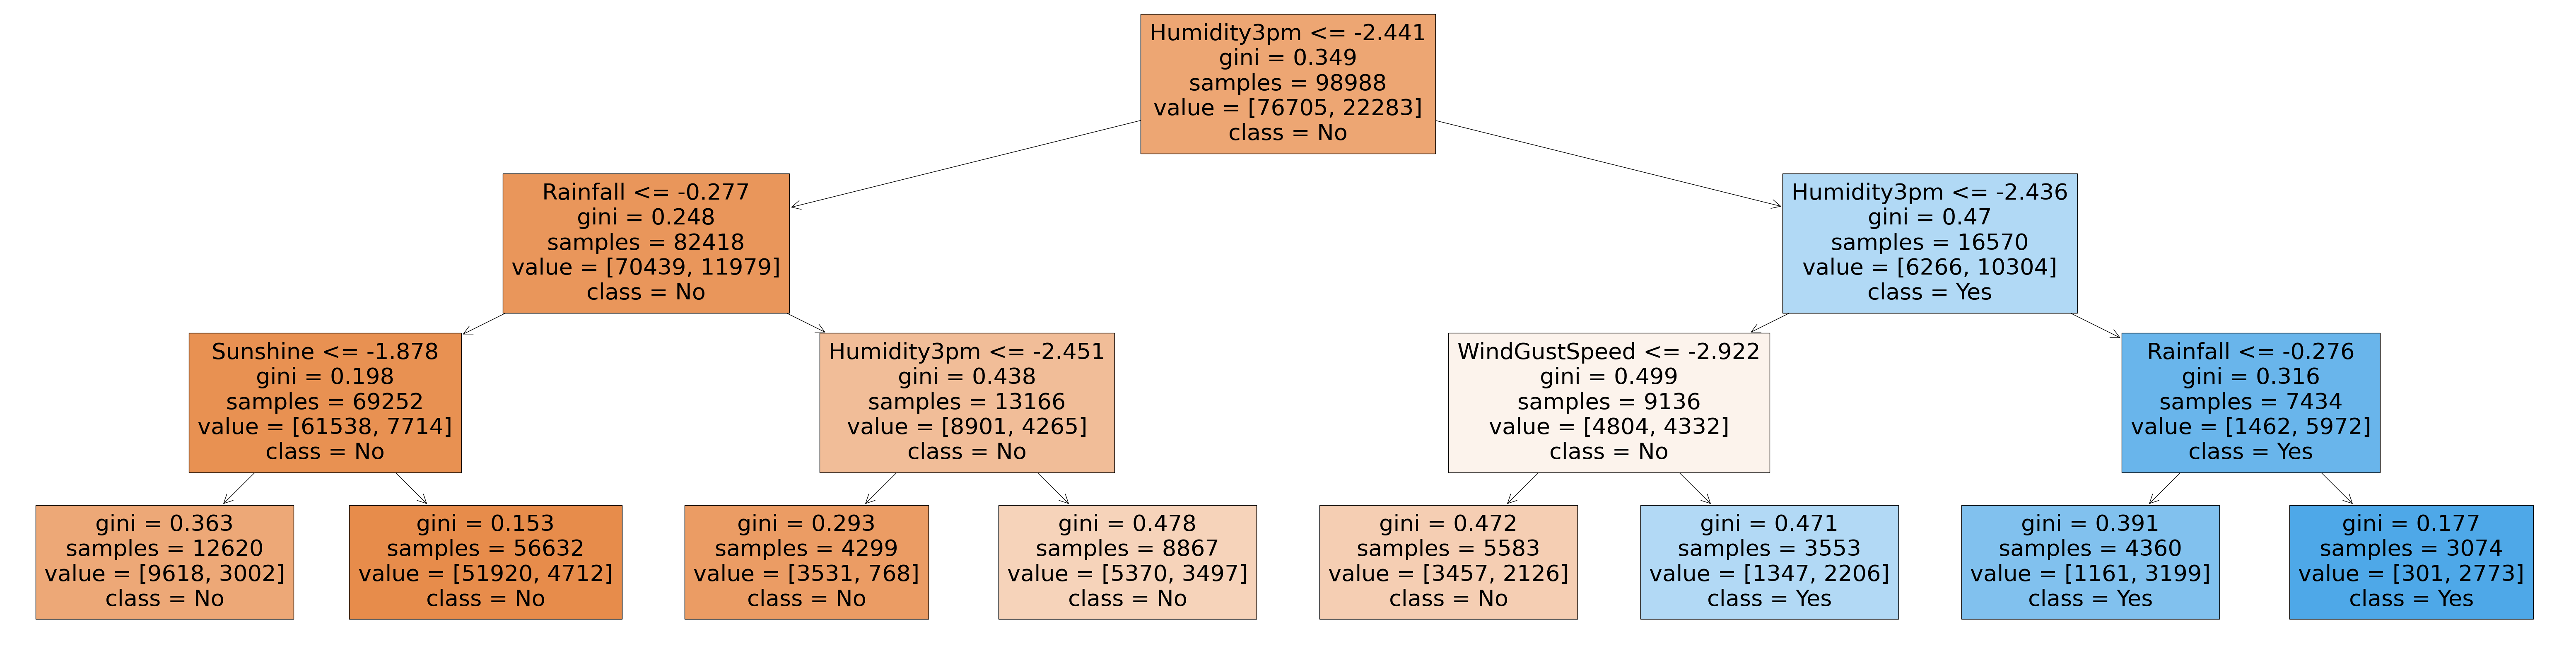

In [115]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, class_names=model.classes_);

In [116]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= -2.44
|   |--- Rainfall <= -0.28
|   |   |--- Sunshine <= -1.88
|   |   |   |--- class: No
|   |   |--- Sunshine >  -1.88
|   |   |   |--- class: No
|   |--- Rainfall >  -0.28
|   |   |--- Humidity3pm <= -2.45
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  -2.45
|   |   |   |--- class: No
|--- Humidity3pm >  -2.44
|   |--- Humidity3pm <= -2.44
|   |   |--- WindGustSpeed <= -2.92
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  -2.92
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  -2.44
|   |   |--- Rainfall <= -0.28
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  -0.28
|   |   |   |--- class: Yes



In [117]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [118]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

Wall time: 1min 25s


In [119]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157391


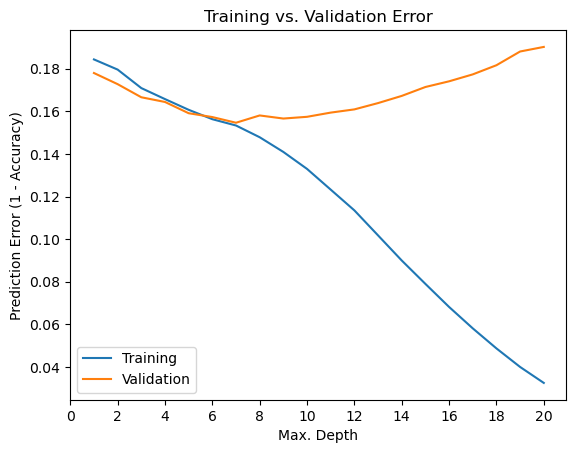

In [121]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">




You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [122]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

#### b. max_leaf_nodes

In [126]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [127]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [128]:
model.score(X_train, train_targets)

0.8480421869317493

In [129]:
model.score(X_val, val_targets)

0.8442342290058615

In [130]:
model.tree_.max_depth

12

As we have 12 as our max depth means the tree did not keep branching uniformly, else we would have only 7 as the max_depth. So, we can say that decision tree tries to find an optimal branch and then branches out, not uniformly everytime.

In [131]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= -2.44
|   |--- Rainfall <= -0.28
|   |   |--- Sunshine <= -1.88
|   |   |   |--- Pressure3pm <= -144.20
|   |   |   |   |--- WindGustSpeed <= -2.92
|   |   |   |   |   |--- Humidity3pm <= -2.46
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  -2.46
|   |   |   |   |   |   |--- Sunshine <= -2.00
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  -2.00
|   |   |   |   |   |   |   |--- Pressure3pm <= -144.22
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  -144.22
|   |   |   |   |   |   |   |   |--- Humidity3pm <= -2.45
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   

In [134]:
def try_max_params(md, mln):
    model = DecisionTreeClassifier(max_depth = md, max_leaf_nodes=mln)
    model.fit(X_train, train_targets)
    print("Validation score ",model.score(X_train, train_targets))
    print("Validation score ",model.score(X_val, val_targets))

In [137]:
try_max_params(7,512)

Validation score  0.8466884874934335
Validation score  0.8453949277465034


#### c. Cost Complexity Pruning

The <b>DecisionTreeClassifier</b> provides parameters such as <b>min_samples_leaf</b> and <b>max_depth</b> to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, <b>ccp_alpha</b>. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [141]:
model = DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

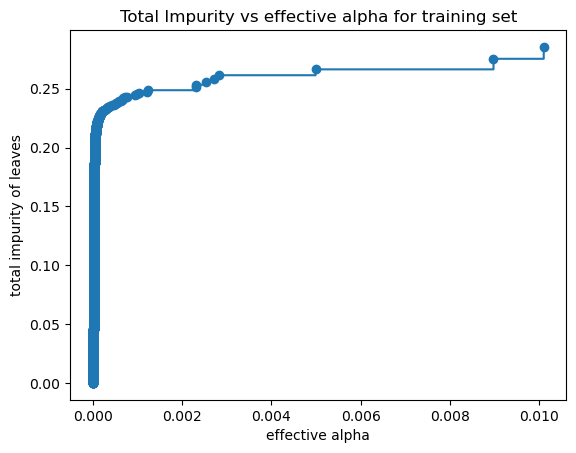

In [142]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")